In [ ]:
import torch
import torchvision
from fastai.vision.all import * 
import time
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');
import cv2
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
files= get_image_files(path)
len(files)

NameError: ignored

# 이미지 흑백 반전


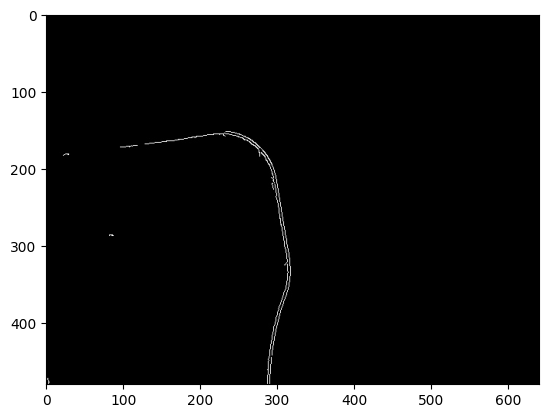

In [ ]:
import numpy as np, cv2
import matplotlib.pylab as plt

#--① 이미지 읽기

# t_image=cv2.imread("/content/drive/MyDrive/cnn_cnc/all_blur/T (1).jpg",cv2.IMREAD_GRAYSCALE)
f_image=cv2.imread("/content/drive/MyDrive/cnn_cnc/all_blur/T (1).jpg")
plt.imshow(f_image)

In [ ]:
np.unique(f_image)

array([  0,   1,   2,   3,   4,   5,   6,   7, 248, 249, 250, 251, 252,
       253, 254, 255], dtype=uint8)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
t_image=255-t_image
t_image

f_image=255-f_image
f_image

array([[ 87,  87,  87, ...,  86,  87,  87],
       [ 87,  87,  87, ...,  86,  87,  87],
       [ 86,  86,  86, ...,  85,  86,  86],
       ...,
       [206, 208, 196, ...,  77,  77,  77],
       [199, 220, 218, ...,  77,  77,  77],
       [196, 228, 229, ...,  77,  77,  77]], dtype=uint8)

# 새 섹션

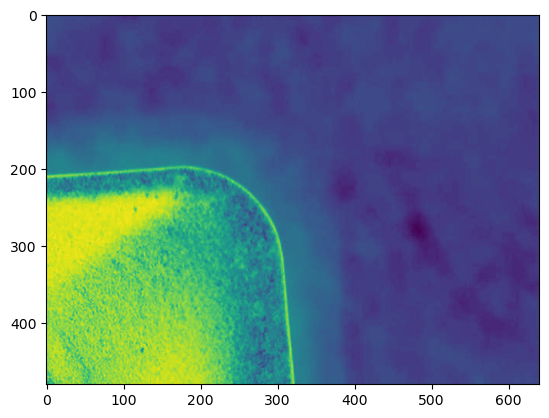

In [ ]:
plt.imshow(t_image)

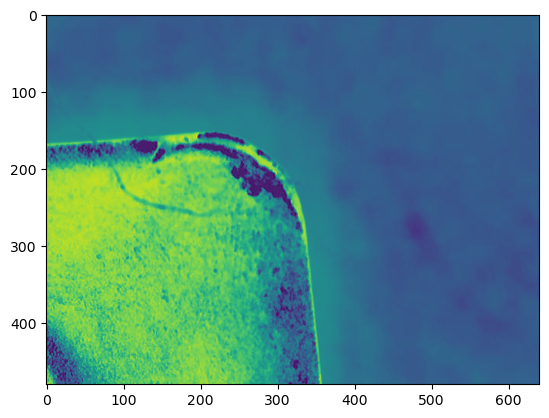

In [ ]:
plt.imshow(f_image)

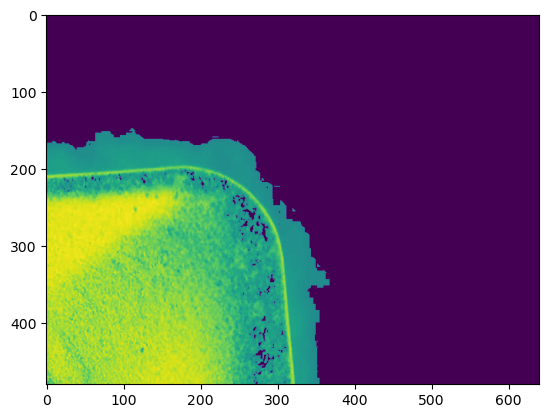

In [ ]:
#mask
f_image=cv2.imread("C:/Users/31083/Pictures/Camera Roll/WIN_20230328_13_36_59_Pro.jpg",cv2.IMREAD_GRAYSCALE)
f_image=255-f_image
f_image

threshold=110
f_image2=f_image
f_image2[f_image2<threshold]=0
plt.imshow(f_image2)

# 가우시안 필터

In [ ]:
import os
import cv2

input_folder = "C:/Users/31083/Downloads/cnn_cnc/all__2"
output_folder = "C:/Users/31083/Downloads/cnn_cnc/ga_blur"

# 모든 이미지 파일의 경로를 가져옵니다.
image_paths = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(".jpg")]

# 모든 이미지 파일에 대해 가우시안 필터를 적용하고, 결과 이미지를 저장합니다.
for image_path in image_paths:
    # 이미지 파일을 읽어옵니다.
    image = cv2.imread(image_path)

    # 가우시안 필터를 적용합니다.
    blurred = cv2.GaussianBlur(image, (5, 5), 0)

    # 출력 파일 경로를 생성합니다.
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # 결과 이미지를 저장합니다.
    cv2.imwrite(output_path, blurred)


# 가우시안 필터 -> 이미지 윤곽선

## 확인용

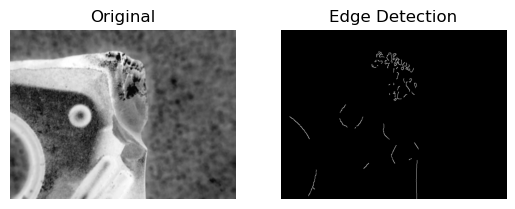

In [ ]:


# Image Load
f_image = cv2.imread("C:/Users/31083/Desktop/cnc/cnn_cnc/ga_blur/f_1_6 (1).jpg",cv2.IMREAD_GRAYSCALE)
f_image=255-f_image
f_image


# OpenCV
output = cv2.Canny(f_image, 200, 300)

# view
plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(f_image, cmap='gray')

plt.subplot(1,2,2)
plt.title('Edge Detection')
plt.axis('off')
plt.imshow(output, cmap='gray')

plt.show()

## 전체 변환

In [ ]:
input_folder = "C:/Users/31083/Desktop/cnc/cnn_cnc/ga_blur"
output_folder = "C:/Users/31083/Desktop/cnc/cnn_cnc/ga_edge"

# 모든 이미지 파일의 경로를 가져옵니다.
image_paths = [os.path.join(input_folder, f) for f in os.listdir(input_folder) if f.endswith(".jpg")]

# 모든 이미지 파일에 대해 Canny Edge Detection 알고리즘을 적용하고, 결과 이미지를 저장합니다.
for image_path in image_paths:
    # 이미지 파일을 읽어옵니다.
    image = cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)

    # Canny Edge Detection 알고리즘을 적용합니다.
    edges = cv2.Canny(image, 200, 300)

    # 출력 파일 경로를 생성합니다.
    output_path = os.path.join(output_folder, os.path.basename(image_path))

    # 결과 이미지를 저장합니다.
    cv2.imwrite(output_path, edges)

# 가우시안 필터 -> 이미지 윤곽선 - > data argumetation


## FILP

In [ ]:
from PIL import Image
import os

# 기존 이미지 파일 경로와 새로운 이미지 파일 경로 설정
input_dir = 'C:/Users/31083/Desktop/cnc/cnn_cnc/ga_edge/nor'
output_dir = 'C:/Users/31083/Desktop/cnc/cnn_cnc/ga_edge/filp'

# 새로운 폴더가 없으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 폴더 내 모든 파일에 대해 반복
for filename in os.listdir(input_dir):
    # 이미지 파일이 아니면 건너뜀
    if not filename.endswith('.jpg') and not filename.endswith('.png'):
        continue

    # 이미지 파일 열기
    with Image.open(os.path.join(input_dir, filename)) as im:
        # 좌우로 반전시키기
        flipped_im = im.transpose(method=Image.FLIP_LEFT_RIGHT)
        # 파일 이름 생성
        new_filename =  'T_filp'  + filename 
        # 새로운 폴더에 저장
        flipped_im.save(os.path.join(output_dir, new_filename))


C:\Users\31083\AppData\Local\Temp\ipykernel_17028\2868193387.py:21: DeprecationWarning: FLIP_LEFT_RIGHT is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_LEFT_RIGHT instead.
  flipped_im = im.transpose(method=Image.FLIP_LEFT_RIGHT)


## TOP_BOTTOM

In [ ]:
from PIL import Image
import os

# 이미지 파일이 있는 폴더 경로
input_dir = 'C:/Users/31083/Desktop/cnc/cnn_cnc/ga_edge/nor'
output_dir = 'C:/Users/31083/Desktop/cnc/cnn_cnc/ga_edge/top_bottom'

# 새로운 폴더가 없으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    
    

# 폴더 내 모든 파일에 대해 반복
for filename in os.listdir(input_dir):
    # 이미지 파일이 아니면 건너뜀
    if not filename.endswith('.jpg') and not filename.endswith('.png'):
        continue

    # 이미지 파일 열기
    with Image.open(os.path.join(input_dir, filename)) as im:
        # 좌우로 반전시키기
        flipped_im = im.transpose(method=Image.FLIP_TOP_BOTTOM)
        # 파일 이름 생성
        new_filename =  'T_topbottom'  + filename 
        # 새로운 폴더에 저장
        flipped_im.save(os.path.join(output_dir, new_filename))



C:\Users\31083\AppData\Local\Temp\ipykernel_17028\3429441317.py:23: DeprecationWarning: FLIP_TOP_BOTTOM is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.FLIP_TOP_BOTTOM instead.
  flipped_im = im.transpose(method=Image.FLIP_TOP_BOTTOM)


# DL create

In [ ]:

import torch
import torchvision
from fastai.vision.all import * 
import time
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }');
import cv2
import matplotlib.pyplot as plt
from skimage import io
from PIL import Image
import os
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

path = '/content/drive/MyDrive/cnn_cnc/all_blur'
files = get_image_files(path)


In [ ]:

def label_func(fname):
    if fname[0].isupper():  # 이미지 파일명에서 파일명만 추출하기 위해 .name 추가
        return 'normal'
    else:
        return 'fail'

dls = ImageDataLoaders.from_name_func(
    path, files, label_func, 
    item_tfms=Resize(224), 
    batch_size=16, 
    train='train',  # 데이터셋을 train, valid, test로 구분하여 명시적으로 지정
    valid='valid',
    test='test'
)
def label_func(file_path):
    # 파일 경로로부터 이미지의 레이블(마스크) 생성
    
    # 파일 이름 추출
    file_name = file_path.name
    
    # 파일 이름이 대문자인 경우 클래스 1로, 소문자인 경우 클래스 0으로 라벨링
    if file_name.isupper():
        label = 'normal'
    else:
        label = 0
    
    # 라벨 값 반환
    return label

data = SegmentationDataLoaders.from_label_func(
    path='/content/drive/MyDrive/cnn_cnc/all_blur', 
    fnames=files, 
    label_func=label_func, 
    item_tfms=Resize(224),  # 이미지 크기 조절 등의 전처리 작업을 정의
    batch_size=16, 
    train='train', 
    valid='valid', 
    test='test'
)



`-` PATH

In [ ]:
data.valid.show_batch()

NameError: ignored

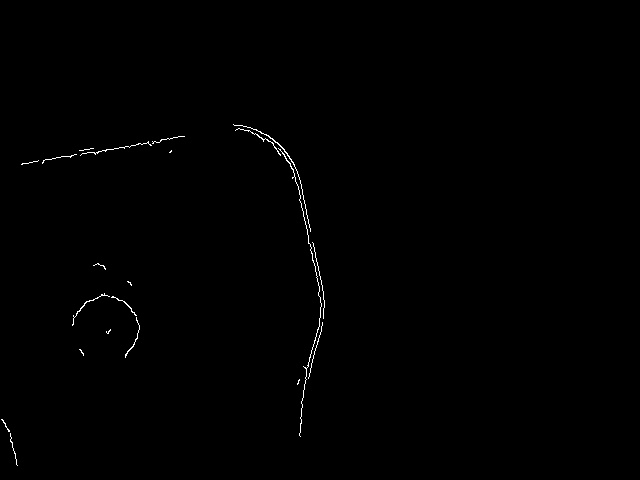

In [ ]:
# path = 'C:/Users/31083/Desktop/cnc/cnn_cnc/ga__blur_edge/all'
path = '/content/drive/MyDrive/cnn_cnc/all_blur'
files= get_image_files(path)

PILImage.create(files[0])

In [ ]:
files[0].shape

AttributeError: ignored

In [ ]:
def label_func(fname):
  if fname[0].isupper():
    return 'normal'
  else:
    return 'fail'

In [ ]:
b  = data.one_batch()
x, y = b
x.size(), y.size()

(torch.Size([16, 3, 224, 224]), torch.Size([16]))

In [ ]:
!pip install semtorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.4/887.4 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 51.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 70.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 47.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.4 MB/s eta 0:00:00
  Created wheel for semtorch: filename=SemTorch-0.1.1-py3-none-any.whl size=50566 sha256=23fe940ae9c94e1e5c8a3384654d8ae5527fbf6fe947cc5

In [ ]:
# learn = unet_learner(
#     data,                            # 데이터 로더
#     resnet34,n_out=1, # 모델 아키텍처
#     loss_func=CrossEntropyLossFlat(axis=-1) # 학습 중 평가를 위한 손실 함수
   
# )
# # 학습 설정 및 학습 시작
# learn.to_fp16()
# learn.fine_tune(5)


from semtorch import get_segmentation_learner

def get_segmentation_learner(dls, number_classes, segmentation_type, architecture_name, backbone_name,
                             loss_func=None, opt_func=Adam, lr=defaults.lr, splitter=trainable_params, 
                             cbs=None, pretrained=True, normalize=True, image_size=None, metrics=None, 
                             path=None, model_dir='models', wd=None, wd_bn_bias=False, train_bn=True,
                             moms=(0.95,0.85,0.95)):

learn = get_segmentation_learner(dls=dls, number_classes=2, segmentation_type="Semantic Segmentation",
                                 architecture_name="deeplabv3+", backbone_name="resnet50", 
                                 metrics=[ Dice(), JaccardCoeff()],wd=1e-2,
                                 splitter=segmentron_splitter).to_fp16()

SyntaxError: ignored

In [ ]:
model = resnet18()
model.conv1 

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

# 새 섹션

In [ ]:
learn.model

DynamicUnet(
  (layers): ModuleList(
    (0): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05

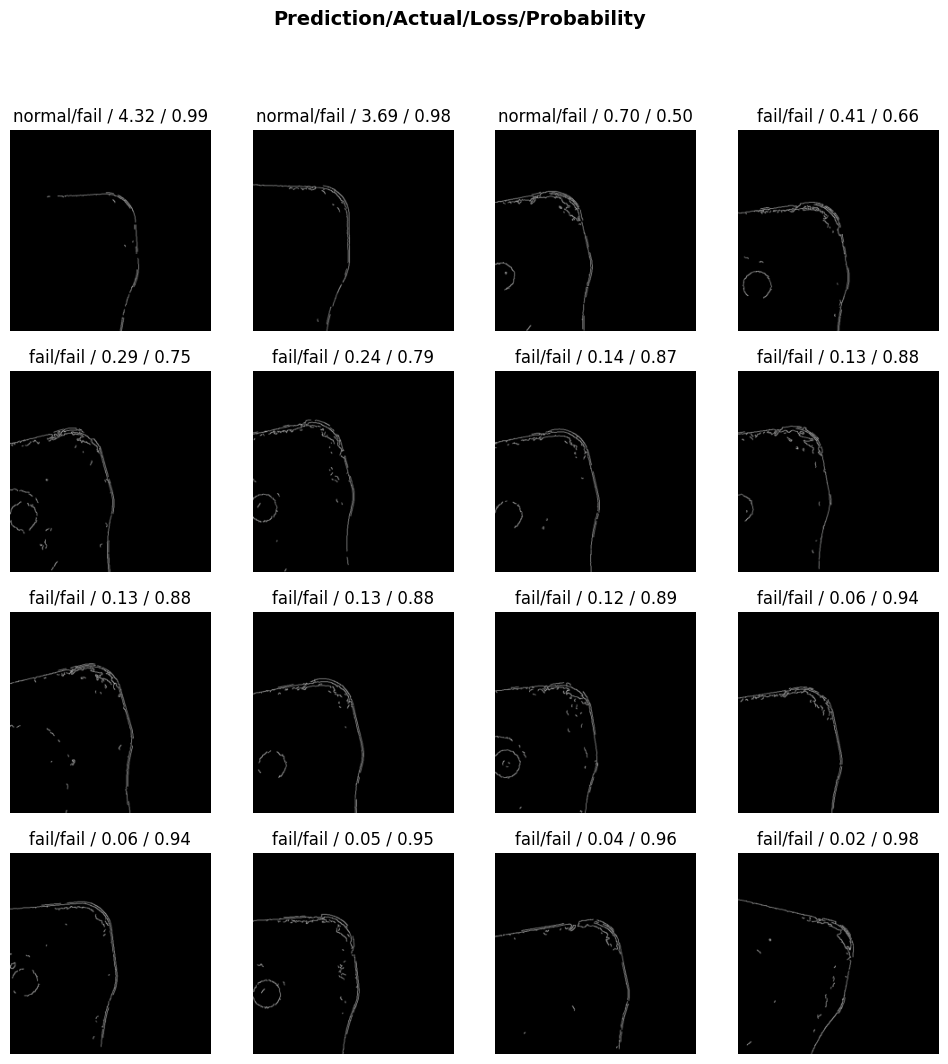

In [ ]:
interpreter = Interpretation.from_learner(lrnr) # 오답을 분석하는 오브젝트를 만듬.. 재료는 클래시파이어! 
interpreter.plot_top_losses(16) # 오답을 분석하는 오브젝트는 가장 오류가 높은 이미지를 정렬하여 보여주는 기능이 있음..

In [ ]:
def cam(img_path):
    img = PILImage.create(img_path)
    xb,_ = lrnr.dls.one_item(img)
    hook = hook_output(lrnr.model[0])
    with torch.no_grad(): output = lrnr.model.eval()(xb)
    acts = hook.stored[0].cpu()
    class_idx = output.argmax()
    sz = img.shape[1:]
    up_sz = (sz[0]//16+1)*16, (sz[1]//16+1)*16
    up_acts = torch.nn.functional.interpolate(acts[0], up_sz, mode='bilinear', align_corners=False)
    avg_acts = up_acts.mean(0)
    heatmap = (avg_acts>0).float()
    heatmap /= heatmap.sum()
    x, y = img.size
    heatmap = heatmap.unsqueeze(0).unsqueeze(0)
    heatmap = torch.nn.functional.interpolate(heatmap, (x,y), mode='bilinear', align_corners=False)
    heatmap = heatmap.squeeze().numpy()
    heatmap = cv2.resize(heatmap, (x,y))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    cam_img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
    cam_img = cv2.addWeighted(cam_img, 0.5, heatmap, 0.5, 0)
    return cam_img


In [ ]:
from PIL import Image

img_path = "/content/drive/MyDrive/cnn_cnc/all_blur/T (1).jpg"
img = Image.open(img_path)
img_tensor = torch.Tensor(np.array(img)).unsqueeze(0).permute(0, 3, 1, 2)

dense_tensor = img_tensor.permute(0, 2, 3, 1).to_dense()
cam_img = cam(dense_tensor)
plt.imshow(cam_img.squeeze())




RuntimeError: ignored

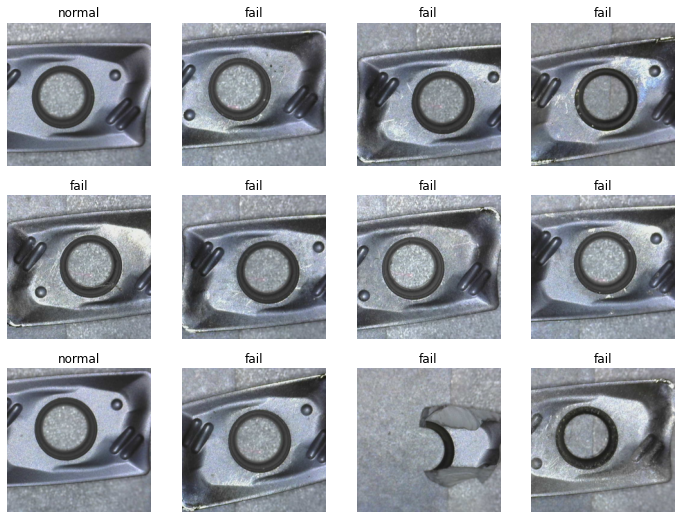

In [ ]:
dls = ImageDataLoaders.from_name_func(path,files,label_func,\
                                      item_tfms=Resize(224), batch_size=32)
dls.show_batch(max_n=12)

In [ ]:
lrnr = vision_learner(dls,resnet34,metrics=accuracy) 
lrnr.fine_tune(6)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
lrnr.show_results()

NameError: ignored

In [ ]:
interpreter = Interpretation.from_learner(lrnr) # 오답을 분석하는 오브젝트를 만듬.. 재료는 클래시파이어! 
interpreter.plot_top_losses(16) # 오답을 분석하는 오브젝트는 가장 오류가 높은 이미지를 정렬하여 보여주는 기능이 있음..

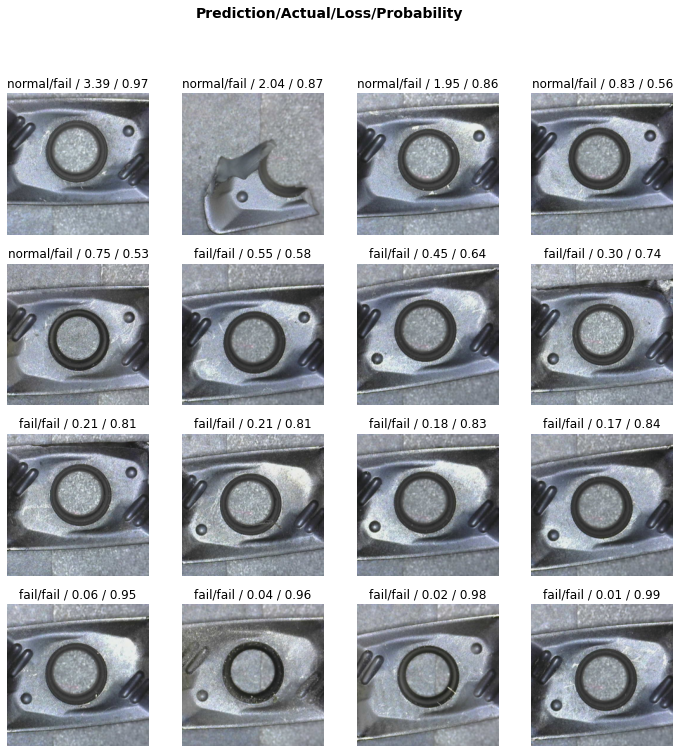

In [ ]:
interpreter.plot_top_losses(16) # 오답을 분석하는 오브젝트는 가장 오류가 높은 이미지를 정렬하여 보여주는 기능이 있음..

In [ ]:
lrnr.predict(files[7])

('normal', TensorBase(1), TensorBase([3.2453e-08, 1.0000e+00]))

In [ ]:
files[7]

Path('/content/drive/MyDrive/cnn_cnc/all/t(11).jpg')

In [ ]:
lrnr.validate()

NameError: ignored